# Projet Math-Info: Lignes de niveau
  $\quad$L’objectif de ce projet numérique est de développer un programme Python permettant de calculer les lignes de niveau d’une fonction $f$ de deux variables réelles et à valeurs réelles (supposée continûment différentiable), c’est-à-dire les ensembles de la forme\
$ \bf{\qquad {(x,y)∈ R^{2}|f(x,y)=c}}$ où $\bf{c∈R}.$ \
La représentation graphique de ces courbes est un tracé de contour (cf. les
exemples d’usage de la fonction contour de matplotlib).
## Sommaire:
 ### - find_seed
 ### - contour
 ### - simple_contour version "naïve"
 ### - simple_contour version "méthode de Newton"

In [34]:
from math import *
import numpy as np

def f(x,y):
    """
    fonction test
    """
    res = 2*(np.exp(-np.power(x,2)-np.power(y,2))-np.exp(-np.power(x-1,2)-np.power(y-1,2)))
    return(res)

def g(x,y):
    """
    fonction test
    """
    return(np.power(np.power(x,2)+np.power(y,2),0.5))

## find_seed(g,c,delta)

### Remarque : 
 Ici par rapport aux notations des polycopiés, on a g qui est fonction d'une seule variable, c'est à dire par exemple $g(t) = f(0,t)$ pour tout t appartenant à $[0,1]$.

Une condition raisonnable sur $f, c, f(0,0)$ et  $f(0,1)$ (ou sur $g, c, g(0)$ et  $g(1))$ \
On peut demander au minimum $f   C^{0}$ et $ \min{(f(0,0),f(0,1))} \leq c \leq \max{(f(0,0),f(0,1))}$ ou encore plus généralement $g \ C^{0}$ et $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$. \
 Cela garantit en effet que c appartient à $g([0,1]) = f({0}\times[0,1])$ par le théorème des valeurs intermédiaires.
 
 Ce n'est pas une condition nécéssaire puisqu'il serait nécessaire et suffisant pour une fonction continue d'avoir $\inf(f) \leq c \leq \sup(f)$ sur $[0,1]$, mais cette condition est minimale pour une condition portant sur $g, g(0)$ et $g(1)$ puisqu'il existe des fonctions non continues vérifiant $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g, et des fonctions continues telles que l'on n'est pas $\min{(g(0),g(1))} \leq c \leq \max{(g(0),g(1))}$ et c n'appartient pas à l'image de $[0,1]$ par g.

### Avec cette hypothèse sur g, on peut proposer une approche par dichotomie :
#### - invariant de boucle: $f(ta)= a \leq c \leq b \leq f(tb)$
#### - variant de boucle: $ta-tb = (\frac{1}{2})^{k}$

In [35]:
def find_seed(g, c=0, eps=2**(-26)):
    """
    recherche d'une solution de t de [0,1] tq g(t) = c,
    à condition que c soit dans [g(0),g(1)] ou [g(1),g(0)]
    """
    a, b = g(0),g(1)
    ta, tb = 0, 1
    if a > b:
        a, b = b, a
        ta, tb = tb, ta
    try:
        if c < a or c > b :
            raise ValueError
    except ValueError:
        return(None)
    #invariants: f(ta)=a<=c<=b=f(tb)
    t = (ta + tb)/2
    while abs(g(t)-c) > eps :
        if g(t) < c:
            a = g(t)
            ta = t
        else:
            b = g(t)
            tb = t
        t = (ta + tb)/2
    return t

## contour(f,c,xc,yc,delta)

 On supposera dans cette partie déjà écrite la fonction simple_contour.\
Le principe est de découper la zone en quadrillage avec les tableaux $xc$ et $yc$.\
Dans chaque case de ce quadrillage, on applique simple_contour à une fonction $ftilde$ qui correspond à $f$ par la transformation affine $(xa + (xb-xa).tx, ya + (yb-ya).ty)$\
On obtient les coordonnées des points de $[0,1]²$ en lesquels $ftilde$ vaut $c$\
On en déduit par $x,y = (xa + (xb-xa).tx, ya + (yb-ya).ty)$ les coordonnées des points dans $[xa,xb]\times[ya,yb]$ en lesquels $f$ vaut $c$.

In [36]:
def contour(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc) sous la forme de 2 listes de tableaux
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

## simple_contour(f,c,delta) version "naïve"

On divise l'axe des abscisses en abscisses chacune écartée de $delta$ $(xi = i\times delta)$\
On trouve pour chacune de ces abscisses une ordonnée $yi$ grâce à find_seed avec la fonction $g(t) = f(xi,t)$

In [37]:
def simple_contour_naif(f,c=0.0,delta = 0.01):
    """
    renvoie une partie de courbe de niveau
    """
    x = np.arange(0,1,delta)
    y = np.zeros(len(x),dtype = float)
    for i,xi in enumerate(x):
        yi = find_seed(lambda t : f(xi,t),c)
        if yi == None:
            y[i] = None
        else:
            y[i] = yi
    return(x,y)

def contour_naif(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc) sous la forme de 2 listes de tableaux
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour_naif(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

vitesse d'éxécution = 17.55172872543335


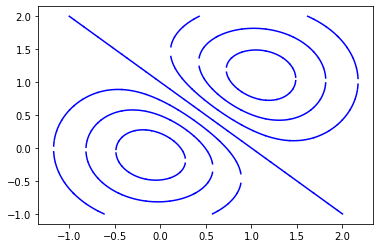

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

top = time.time()
for c in [-1.5,-1.,-0.5,0,0.5,1.,1.5]:
    xc, yc = np.linspace(-2.,3.,20), np.linspace(-1.,2.,20)
    xs, ys = contour_naif(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'b')

print(f"vitesse d'éxécution = {time.time()-top}")
plt.show()

# simple_contour(f,c,delta) version "méthode de Newton"

Le principe est le suivant:
### 1) trouver une racine
On utilise pour cela find_seed pour la fonction $g(t) = f(xi,t)$ avec $xi = i.delta$ tant que $xi \leq 1$. On note le couple trouvé $(xc,yc)$
### 2) propagation
Le but est ici de trouver une autre racine à une distance delta de $(xc,yc)$. Pour cela, on utilise la méthode de Newton en dimension 2 avec la fonction $F(x,y)=(f(x,y) - c,(x-xc)^{2} + (y-yc)^{2} - delta^{2})$. On aura donc un couple $(x,y)$ qui vérifiera $f(x,y) = c$ et $d((x,y),(xc,yc))=delta$.

Il faut cependant trouver un point "pas trop loin de cette future racine" pour utiliser Newton. Une idée est de prendre un point à distance $delta$ de $(xc,yc)$ qui est sur la tangente à la courbe $f(x,y)=c$ au point $(xc,yc)$. On connaît un vecteur normal à la courbe avec le gradient: $ \large{\vec{n} = \frac{\vec{\nabla} {f}(xc,yc)}{||\vec{\nabla} {f}(xc,yc)||}}$. 
On en déduit deux vecteurs tangent normés: $ \vec{T_1} = delta . \begin{pmatrix} 
 -n_1 \\ 
 n_0 \\ 
 \end{pmatrix} $ et $\vec{T_2} = - \vec{T_1}$. On peut donc prendre comme point initial de la méthode de Newton $\begin{pmatrix} 
 x_0 \\ 
 y_0 \\ 
 \end{pmatrix} = \begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix} + \vec{T_1}$ ou $\begin{pmatrix} 
 x_0 \\ 
 y_0 \\ 
 \end{pmatrix} = \begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix} + \vec{T_2}$

**Intérêt des vecteurs tangents:** ils définissent le sens de parcours du contour (si la fonction n'est pas trop biscornue). Ainsi, si on pourrait croire que choisir un vecteur tangent nos fait perdre la partie non englobé par le sens de parcours, et bien il suffit donc de faire toute la courbe dans le sens de $\vec{T_1}$, puis le reste dans le sens de $\vec{T_2}$.\
Dans le programme suivant on : \
$f(x_{n+1},y_{n+1})=f(x_{n},y_{n})+ J_f(x_n,y_n)\times \begin{pmatrix} 
 x_{n+1}-x_n \\ 
 y_{n+1}-y_n \\ 
 \end{pmatrix}\\
 f(x_{n+1},y_{n+1})\simeq c= \begin{pmatrix} 
 f_x \\ 
 f_y \\ 
 \end{pmatrix}\\ \begin{pmatrix} 
 x_{n+1} \\ 
 y_{n+1} \\ 
 \end{pmatrix}= 
 \begin{pmatrix} 
 x_n \\ 
 y_n \\ 
 \end{pmatrix} + J_f^{-1}(x_n,y_n)\times (c- f(x_n,y_n))$

In [39]:
import autograd
from autograd import numpy as np

def newton_2D(f, x0, y0, fx = 0, fy = 0, eps = 2**(-26)):
    """
    méthode de newton pour f une fonction de R² dans R²
    renvoie un couple (x0,y0) qui représente les coordonnées d'une solution au 
    problème f(x,y) = (fx,fy)
    """
    def J_f(x,y):
        """
        donne le jacobien de f au point de coordonnées (x,y)
        sous la forme d'une matrice carrée
        """
        j = autograd.jacobian
        return np.c_[j(f,0)(x,y), j(f,1)(x,y)]
    
    imx, imy = f(x0,y0)[0], f(x0,y0)[1]
    c = np.array([[fx],
                  [fy]])
    pos = np.array([[x0],
                    [y0]])
    im = np.array([[imx],
                    [imy]])
    try:
        while max(abs(imx - fx), abs(imy - fy)) > eps:
            J = J_f(x0,y0)
            a,b,c,d = J[0,0],J[0,1],J[1,0],J[1,1]
            #test inversibilite de J
            if a*d-b*c == 0:
                raise ValueError("matrice non inversible")
            pos = pos + np.dot(np.linalg.inv(J),c-im)
            x0,y0 = pos[0][0],pos[1][0]
            imx,imy = f(x0,y0)[0], f(x0,y0)[1]
            pos = np.array([[x0],
                            [y0]])
            im = np.array([[imx],
                            [imy]])
    except ValueError :
        return(x0,y0)
    return(x0,y0)

In [40]:
def grad_f(f,x,y):
    """
    donne le gradient de la fonction à valeurs réelles au point de coordonnées (x,y)
    sous la forme d'un vecteur ligne
    """
    g = autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]

In [41]:
def simple_contour_n(f,c=0.0,delta = 0.01):
    """
    renvoie une partie de courbe de niveau
    """
    maxiter = int(10/delta)
    x,y = [],[]
    exist_seed = False
    i = 0
    while not exist_seed:
        if i * delta > 1:
            return(np.array(x),np.array(y))
        yi = find_seed(lambda t: f(i*delta,t),c)
        if yi == None:
            i += 1
        else:
            x.append(i*delta)
            y.append(yi)
            exist_seed = True
    Xc, Yc = x[-1], y[-1]
    xc,yc = Xc, Yc
    N = 0
    while N<maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([-grad[1],grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(x,y):
            return np.array([f(x,y),np.power(x-x0,2)+np.power(y-y0,2)])
        xc, yc = newton_2D(F, x0, y0, fx = c, fy = delta**2)
        if xc<0 or xc>1 or yc<0 or yc >1:
            N = maxiter
        x.append(xc)
        y.append(yc)
        N += 1
    x.reverse()
    y.reverse()
    xc,yc = Xc, Yc
    N = 0
    while N<maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([grad[1],-grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(x,y):
            return np.array([f(x,y),np.power(x-x0,2)+np.power(y-y0,2)])
        xc, yc = newton_2D(F, x0, y0, fx = c, fy = delta**2)
        if xc<0 or xc>1 or yc<0 or yc >1:
            N = maxiter
        x.append(xc)
        y.append(yc)
        N += 1
    return(np.array(x),np.array(y))

In [42]:
def contour_n(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc)
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour_n(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    
    return(xs,ys)

32.66590690612793


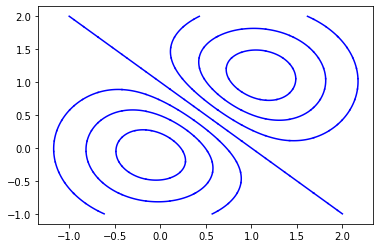

In [43]:
#essai de contour_n

import time

top = time.time()
for c in [-1.5,-1.,-0.5,0,0.5,1.,1.5]:
    xc, yc = np.linspace(-2.,3.,20), np.linspace(-1.,2.,20)
    xs, ys = contour_n(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'b')

print(f"vitesse d'éxécution = {time.time()-top}")
plt.show()


## simple_contour_sc(f,c,delta)

Ici, pour éviter un coûteux calcul de Jacobienne, on fait une propagation avec comme méthode pour trouver le point suivant, une méthode de Newton à la fonction réelle $F(t)=f(p_0 + t.\nabla{f(x_c,y_c)})-c$ avec $p_0 = \begin{pmatrix} 
 x_0 \\ 
 y_0 \\ 
 \end{pmatrix}\\ $ le point défini par $p_0 = \begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix}\\ $ $+  \vec{T} $
 
 On utilise la fonction newton du module scipy.optimize qui est une méthode de newton pour une fonction d'une seule variable réelle et à valeurs réelles.
 
 L'idée d'utiliser une telle fonction F est que la droite passant par $p_0$ orientée par $\vec{\nabla} {f}(xc,yc)$ est casi orthogonale à la courbe $f(x,y)=c$ et ces courbes possèdent donc un point d'intersection. De plus, au voisinnage de $\begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix}$ la courbe est au premier ordre la tangente en ce point. Ainsi, en commençant en $p_0$ qui est à distance $delta$ de $\begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix}$ on est sur d'avoir $p_0$ relativement proche d'une solution sur la droite précédemment évoqué et donc a une distance de $\begin{pmatrix} 
 x_c \\ 
 y_c \\ 
 \end{pmatrix}$ proche de $delta$.

vitesse d'éxécution = 20.096445560455322


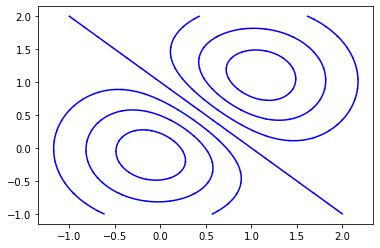

In [51]:
from scipy.optimize import newton



def grad_f(f,x,y):
    """
    donne le gradient de la fonction à valeurs réelles au point de coordonnées (x,y)
    sous la forme d'un vecteur ligne
    """
    g = autograd.grad
    return np.r_[g(f,0)(x,y),g(f,1)(x,y)]


def simple_contour_sc(f,c=0.0,delta = 0.01,):
    """
    renvoie une partie de courbe de niveau
    """
    maxiter = int(10/delta)
    x,y = [],[]
    exist_seed = False
    i = 0
    while not exist_seed:
        if i * delta > 1:
            return(np.array([],dtype = float),np.array([],dtype = float))
        yi = find_seed(lambda t: f(i*delta,t),c)
        if yi == None:
            i += 1
        else:
            x.append(i*delta)
            y.append(yi)
            exist_seed = True
    Xc, Yc = x[-1], y[-1]
    N = 0
    xc,yc = Xc, Yc
    while N < maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([-grad[1],grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(t):
            return (f(x0+t*grad[0],y0+t*grad[1])-c)
        tc = newton(F, 0)
        xc, yc = x0 + tc*grad[0], y0 + tc*grad[1]
        if xc<0 or xc>1 or yc<0 or yc >1:
            N = maxiter
        else:
            x.append(xc)
            y.append(yc)
            N += 1
    x.reverse()
    y.reverse()
    N = 0
    xc,yc = Xc, Yc
    while N <= maxiter:
        grad = grad_f(f,xc,yc)
        tangent = np.array([grad[1],-grad[0]])/np.power(grad[0]**2 + grad[1]**2,1/2)*delta
        x0, y0 = xc + tangent[0], yc + tangent[1]
        def F(t):
            return (f(x0+t*grad[0],y0+t*grad[1])-c)
        tc = newton(F, 0)
        xc, yc = x0 + tc*grad[0], y0 + tc*grad[1]
        if xc<0 or xc>1 or yc<0 or yc >1:
            return(np.array(x),np.array(y))
        x.append(xc)
        y.append(yc)
        N += 1
    return(np.array(x),np.array(y))


def contour_sc(f, c=0.0, xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):
    """
    renvoie des fragments pour chaque case du quadrillage (xc,yc)
    """
    nx = len(xc)
    ny = len(yc)
    xs = []
    ys = []
    for i in range(0,nx-1):
        xa,xb = xc[i],xc[i+1]
        for j in range(0,ny-1):
            ya,yb = yc[j],yc[j+1]
            def ftilde(tx,ty):
                """
                fonction de [0,1]X[0,1]
                """
                return(f(xa+(xb-xa)*tx,ya+(yb-ya)*ty))
            TX,TY = simple_contour_sc(ftilde,c,delta)
            x,y = (xb-xa)*TX + xa, (yb-ya)*TY + ya
            xs.append(x)
            ys.append(y)
    return(xs,ys)

import time

top = time.time()
for c in [-1.5,-1.,-0.5,0,0.5,1.,1.5]:
    xc, yc = np.linspace(-2.,3.,20), np.linspace(-1.,2.,20)
    xs, ys = contour_sc(f,c,xc,yc)
    for x,y in zip(xs,ys):
        plt.plot(x,y,'b')

print(f"vitesse d'éxécution = {time.time()-top}")
plt.show()


## Comparaison des différentes méthodes

In [54]:
import time
def vitesse_execution(g,C,xc,yc,name):
    top = time.time()
    for c in C:
        g(f,c,xc,yc)
    end = time.time()
    print(f"{name} s'éxécute en {end-top}s")

In [55]:
C = [-1.5,-1.,-0.5,0.,0.5,1.,1.5]
xc, yc = np.linspace(-2.,3.,20), np.linspace(-1.,2.,20)

vitesse_execution(contour_naif,C,xc,yc,"contour_naif")
vitesse_execution(contour_n,C,xc,yc,"contour_n")
vitesse_execution(contour_sc,C,xc,yc,"contour_sc")

contour_naif s'éxécute en 13.421269416809082s
contour_n s'éxécute en 30.239619255065918s
contour_sc s'éxécute en 17.98335862159729s


**Comparaison des vitesses d'éxécution**

Pour les mêmes paramètres en entrée, on a contour_naif qui est la fonction la plus rapide et contour_n la plus lente, ce qui peut s'expliquer par la complexité croissante des calculs à effectuer pour passer d'un point au suivant.

**Comparaison des résultats**

On a pour contour_naif une seulement une garantie sur le fait que les points trouvés ont bien comme image par f la valeur c, mais aucune garantie sur leur écartement. On a en effet garantie seulement $\delta{x}=delta$ mais on a aucune garantie sur $\delta{y}$. Ainsi, la fonction est moins précise dans les zones de "fortes pentes verticales", comme on peut voir sur le premier tracé : il y a des trous dans les courbes de niveau à ces endroits là.

La fonction contour_n devrait garantir une distance entre chaque point de $delta$. En effet, la méthode de Newton assure ici que le point trouvé est à une distance $delta$ du précédent, à plus ou moins $eps$. Cependant, suite à plusieurs tests, nous avons remarqué que très rapidement, la suite des itérations de la méthode de Newton passait par un point de Jacobienne non inversible. Pour éviter d'arrêter le processus, nous avons donc relevé l'exception provoquée et renvoyé le dernier point atteint sur lequel nous n'avons aucune garantie.

La fonction contour_sc nous garantie que les points renvoyés ont pour image par $f$ la valeur $c$ mais ne garantie pas a priori la distance entre ces points. Une majoration de cette distance pourrait être apportée par une hypothèse supplémentaire sur $f$ comme par exemple $f$ de classe $C^{2}$.